In [ ]:
pip install numpy pandas scikit-learn tensorflow

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.display import display

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, chi2, f_classif

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, MaxPooling1D
from keras.regularizers import l2



In [3]:
# Read the datasets from CSV files
d1 = pd.read_csv('ptbdb_abnormal.csv', header=None)
d2 = pd.read_csv('ptbdb_normal.csv', header=None)

# Create column names from col1 to col188
column_names = [f'col{i}' for i in range(1, 189)]

# Assign column names to d1 and d2
d1.columns = column_names
d2.columns = column_names


df_ptb = pd.concat([d1, d2], ignore_index=True)

print(df_ptb.head())
print(df_ptb.shape)
print(d1.shape)
print(d2.shape)


       col1      col2      col3      col4      col5  ...  col184  col185  col186  col187  col188
0  0.932233  0.869679  0.886186  0.929626  0.908775  ...     0.0     0.0     0.0     0.0     1.0
1  1.000000  0.606941  0.384181  0.254237  0.223567  ...     0.0     0.0     0.0     0.0     1.0
2  1.000000  0.951613  0.923963  0.853303  0.791859  ...     0.0     0.0     0.0     0.0     1.0
3  0.977819  0.899261  0.230129  0.032348  0.142329  ...     0.0     0.0     0.0     0.0     1.0
4  0.935618  0.801661  0.805815  1.000000  0.722741  ...     0.0     0.0     0.0     0.0     1.0

[5 rows x 188 columns]
(14552, 188)
(10506, 188)
(4046, 188)


In [4]:
X_ptb = df_ptb.iloc[:, :-1]
y_ptb = df_ptb.iloc[:, -1]
x_train_ptb, x_test_ptb, y_train_ptb, y_test_ptb = train_test_split(X_ptb, y_ptb, test_size=0.2)

print("Dimensiunea x_train:", x_train_ptb.shape)
print("Dimensiunea y_train:", y_train_ptb.shape)
print("Dimensiunea x_test:", x_test_ptb.shape)
print("Dimensiunea y_test:", y_test_ptb.shape)

Dimensiunea x_train: (11641, 187)
Dimensiunea y_train: (11641,)
Dimensiunea x_test: (2911, 187)
Dimensiunea y_test: (2911,)


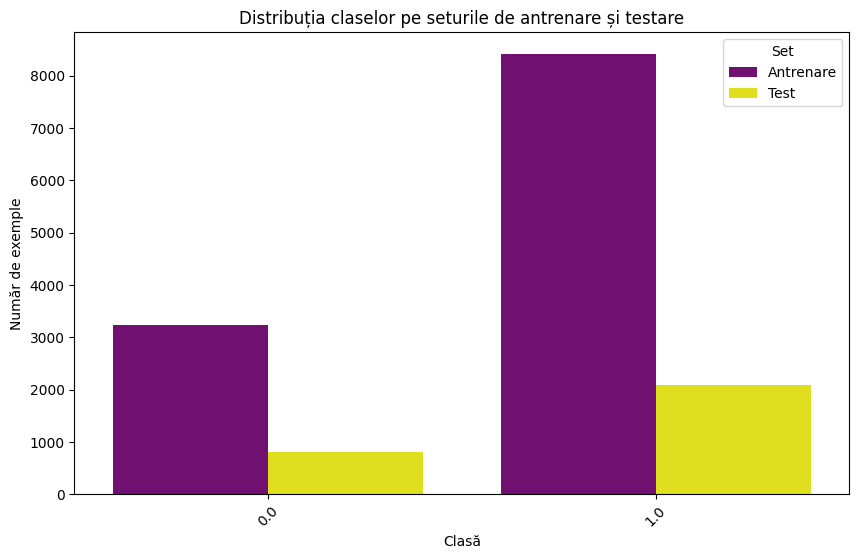

In [5]:
train_df = pd.DataFrame({'Clasă': y_train_ptb, 'Set': 'Antrenare'})
test_df = pd.DataFrame({'Clasă': y_test_ptb, 'Set': 'Test'})

combined_df = pd.concat([train_df, test_df])

# Ordonarea claselor alfabetic
combined_df['Clasă'] = combined_df['Clasă'].astype(str)
combined_df = combined_df.sort_values('Clasă')

custom_palette = sns.color_palette(['purple', 'yellow'])

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Clasă', hue='Set', palette=custom_palette)
plt.title('Distribuția claselor pe seturile de antrenare și testare')
plt.xlabel('Clasă')
plt.ylabel('Număr de exemple')
plt.legend(title='Set')
plt.xticks(rotation=45)
plt.show()

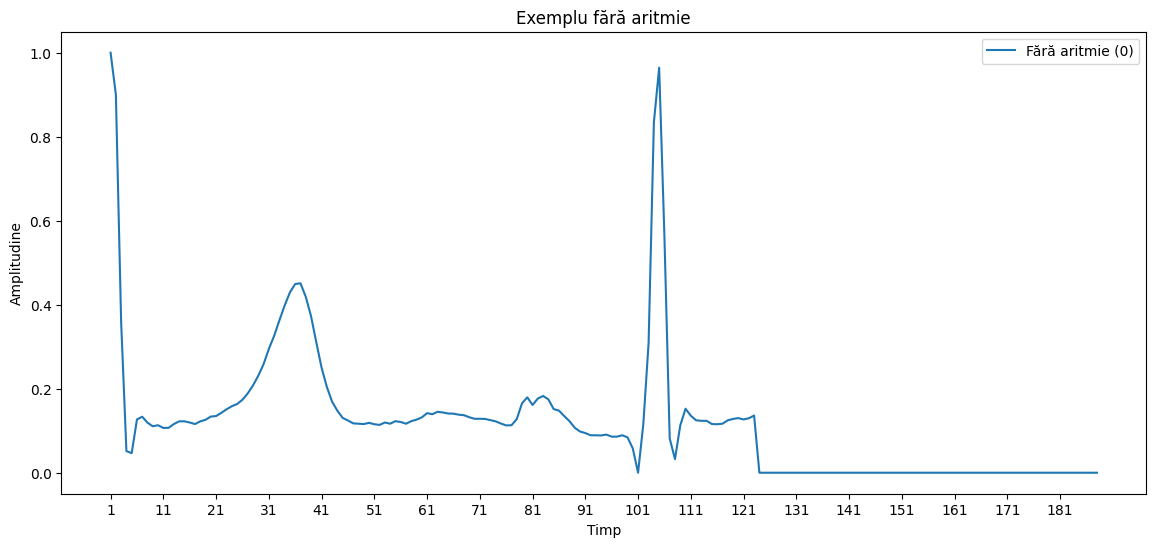

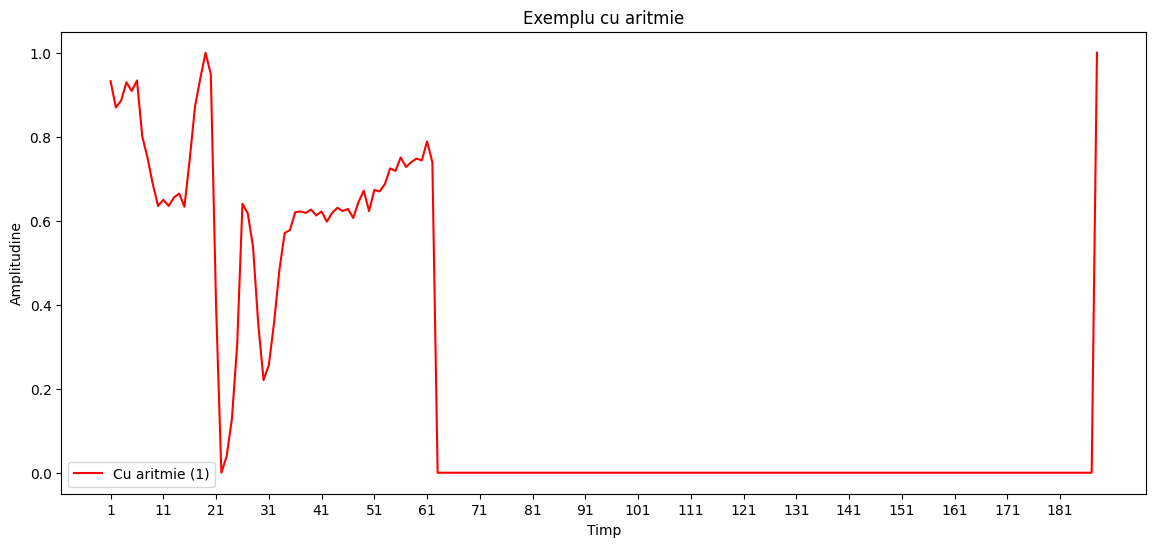

In [6]:
exemplu_fara_aritmie = df_ptb[df_ptb.iloc[:, -1] == 0].iloc[0]
exemplu_cu_aritmie = df_ptb[df_ptb.iloc[:, -1] == 1].iloc[0]

plt.figure(figsize=(14, 6))
plt.plot(exemplu_fara_aritmie, label='Fără aritmie (0)')
plt.title('Exemplu fără aritmie')
plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.legend()
plt.xticks(ticks=range(0, len(exemplu_fara_aritmie), 10), labels=range(1, len(exemplu_fara_aritmie)+1, 10))
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(exemplu_cu_aritmie, label='Cu aritmie (1)', color='red')
plt.title('Exemplu cu aritmie')
plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.legend()
plt.xticks(ticks=range(0, len(exemplu_fara_aritmie), 10), labels=range(1, len(exemplu_fara_aritmie)+1, 10))
plt.show()

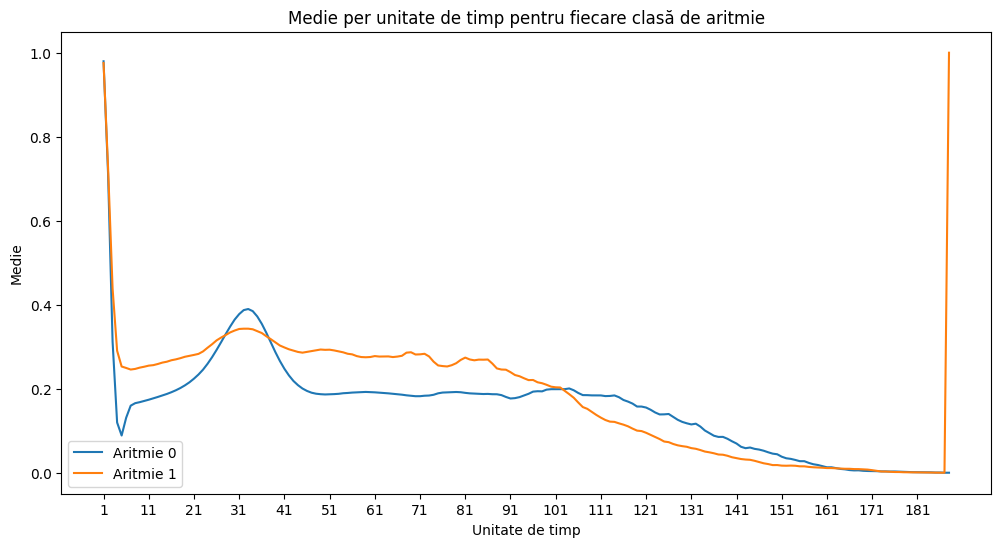

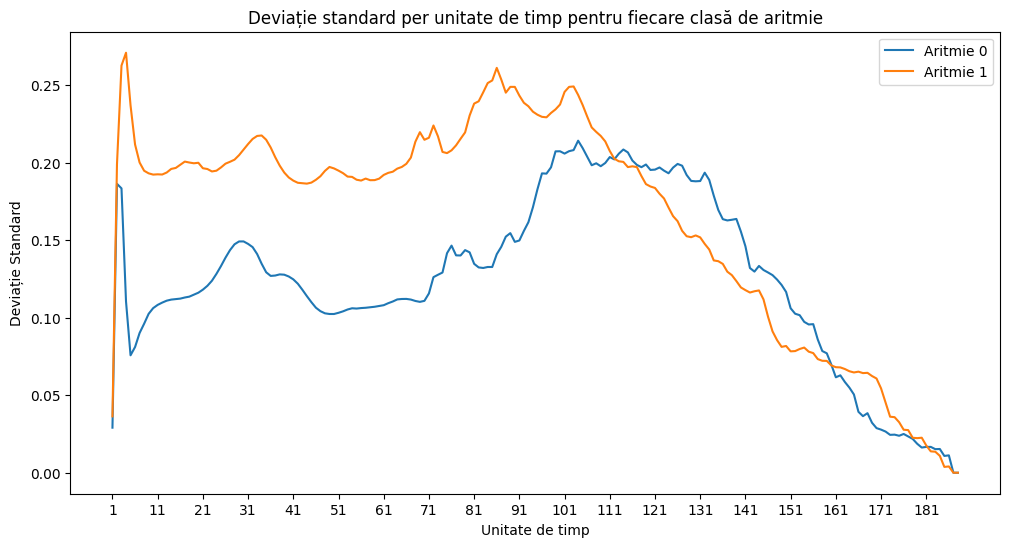

In [7]:
grupuri_aritmii = df_ptb.groupby(df_ptb.iloc[:, -1])

# Calculăm media și deviația standard pentru fiecare clasă de aritmie
medii = grupuri_aritmii.mean()
deviatii_std = grupuri_aritmii.std()

# Afișăm graficul mediei per unitate de timp pentru fiecare clasă de aritmie
plt.figure(figsize=(12, 6))
for index, aritmie in medii.iterrows():
    plt.plot(aritmie.index, aritmie.values, label=f'Aritmie {int(index)}')
plt.title('Medie per unitate de timp pentru fiecare clasă de aritmie')
plt.xlabel('Unitate de timp')
plt.ylabel('Medie')
plt.legend()
plt.xticks(ticks=range(0, len(exemplu_fara_aritmie), 10), labels=range(1, len(exemplu_fara_aritmie)+1, 10))
plt.show()

# Afișăm graficul deviației standard per unitate de timp pentru fiecare clasă de aritmie
plt.figure(figsize=(12, 6))
for index, aritmie in deviatii_std.iterrows():
    plt.plot(aritmie.index, aritmie.values, label=f'Aritmie {int(index)}')
plt.title('Deviație standard per unitate de timp pentru fiecare clasă de aritmie')
plt.xlabel('Unitate de timp')
plt.ylabel('Deviație Standard')
plt.legend()
plt.xticks(ticks=range(0, len(exemplu_fara_aritmie), 10), labels=range(1, len(exemplu_fara_aritmie)+1, 10))
plt.show()

In [8]:
dataset = "./date_tema_1_iaut_2024.csv"
df_patients = pd.read_csv(dataset)
df_patients.head()

categorical_features = [
    "Transportation",
    "Diagnostic_in_family_history",
    "High_calorie_diet",
    "Alcohol",
    "Snacks",
    "Smoker",
    "Calorie_monitoring",
    "Gender",
    "Diagnostic",
]

numeric_features = [
    "Regular_fiber_diet",
    "Sedentary_hours_daily",
    "Age",
    "Est_avg_calorie_intake",
    "Main_meals_daily",
    "Height",
    "Water_daily",
    "Weight",
    "Physical_activity_level",
    "Technology_time_use",
]

for col in numeric_features:
    df_patients[col] = df_patients[col].astype(str).str.replace(',', '.').astype(float)
for col in categorical_features:
    df_patients[col] = df_patients[col].astype("category")
    le = LabelEncoder()
    df_patients[col] = le.fit_transform(df_patients[col])

scaler = StandardScaler()
df_patients[numeric_features] = scaler.fit_transform(df_patients[numeric_features])


X_patients = df_patients.iloc[:, :-1]
y_patients = df_patients.iloc[:, -1:]

y_patients = to_categorical(y_patients)
x_train_patients, x_test_patients, y_train_patients, y_test_patients = train_test_split(X_patients, y_patients, test_size=0.2)

MLP Patients

In [29]:
def create_mlp_model(input_dim, layers, units, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_dim=input_dim))

    for _ in range(layers):
        model.add(Dense(units=units, activation=activation))

    model.add(Dense(units=7, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

input_dim_patients = x_train_patients.shape[1]
layers = 4  # numărul de straturi
units = 128  # dimensiunea fiecărui strat

model_patients = create_mlp_model(input_dim=input_dim_patients, layers=layers, units=units)

model_patients.fit(x_train_patients, y_train_patients, epochs=25, batch_size=24, validation_data=(x_test_patients, y_test_patients))



Epoch 1/25
64/64 [==============================] - 2s 7ms/step - loss: 1.7244 - accuracy: 0.3216 - val_loss: 1.4878 - val_accuracy: 0.4364
Epoch 2/25
64/64 [==============================] - 0s 4ms/step - loss: 1.2908 - accuracy: 0.5013 - val_loss: 1.2827 - val_accuracy: 0.5091
Epoch 3/25
64/64 [==============================] - 0s 4ms/step - loss: 1.1522 - accuracy: 0.5703 - val_loss: 1.2226 - val_accuracy: 0.5221
Epoch 4/25
64/64 [==============================] - 0s 4ms/step - loss: 1.0612 - accuracy: 0.5990 - val_loss: 1.1737 - val_accuracy: 0.5325
Epoch 5/25
64/64 [==============================] - 0s 4ms/step - loss: 1.0032 - accuracy: 0.6296 - val_loss: 1.1261 - val_accuracy: 0.5896
Epoch 6/25
64/64 [==============================] - 0s 4ms/step - loss: 0.9456 - accuracy: 0.6419 - val_loss: 1.0733 - val_accuracy: 0.6286
Epoch 7/25
64/64 [==============================] - 0s 4ms/step - loss: 0.9039 - accuracy: 0.6771 - val_loss: 1.1414 - val_accuracy: 0.6104
Epoch 8/25
64/64 [==

In [10]:
X_ptb = df_ptb.iloc[:, :-1]
y_ptb = df_ptb.iloc[:, -1]
x_train_ptb, x_test_ptb, y_train_ptb, y_test_ptb = train_test_split(X_ptb, y_ptb, test_size=0.2)

scaler = StandardScaler()
x_train_ptb = scaler.fit_transform(x_train_ptb)
x_test_ptb = scaler.transform(x_test_ptb)

In [11]:
def create_mlp_model_2(input_dim, layers, units, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_dim=input_dim))

    for _ in range(layers - 1):
        model.add(Dense(units=units, activation=activation))

    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model

input_dim_patients = x_train_ptb.shape[1]
layers = 2  # numărul de straturi
units = 128  # dimensiunea fiecărui strat

model_ptb = create_mlp_model_2(input_dim=input_dim_patients, layers=layers, units=units)

model_ptb.fit(x_train_ptb, y_train_ptb, epochs=15, batch_size=24, validation_data=(x_test_ptb, y_test_ptb))

Epoch 1/15
486/486 [==============================] - 3s 4ms/step - loss: 0.3280 - accuracy: 0.8521 - val_loss: 0.2391 - val_accuracy: 0.9048
Epoch 2/15
486/486 [==============================] - 1s 3ms/step - loss: 0.2068 - accuracy: 0.9173 - val_loss: 0.1814 - val_accuracy: 0.9310
Epoch 3/15
486/486 [==============================] - 2s 3ms/step - loss: 0.1522 - accuracy: 0.9391 - val_loss: 0.1544 - val_accuracy: 0.9361
Epoch 4/15
486/486 [==============================] - 1s 3ms/step - loss: 0.1221 - accuracy: 0.9539 - val_loss: 0.1363 - val_accuracy: 0.9512
Epoch 5/15
486/486 [==============================] - 2s 3ms/step - loss: 0.1003 - accuracy: 0.9653 - val_loss: 0.1245 - val_accuracy: 0.9526
Epoch 6/15
486/486 [==============================] - 2s 3ms/step - loss: 0.0817 - accuracy: 0.9716 - val_loss: 0.1255 - val_accuracy: 0.9581
Epoch 7/15
486/486 [==============================] - 2s 3ms/step - loss: 0.0706 - accuracy: 0.9765 - val_loss: 0.1239 - val_accuracy: 0.9571
Epoch 

Convolutional

In [12]:
def create_conv_model(kernel_size):
    model = Sequential()
    model.add(Conv1D(32, kernel_size, activation='relu', input_shape=(x_train_ptb.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(Conv1D(64, kernel_size, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv1D(128, kernel_size, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_patients_conv = create_conv_model(3)
model_patients_conv.fit(x_train_ptb, y_train_ptb, epochs=25, batch_size=32, validation_data=(x_test_ptb, y_test_ptb))
loss, accuracy = model_patients_conv.evaluate(x_test_ptb, y_test_ptb)

print(f'Accuracy on PTB dataset: {accuracy*100:.2f}%')

Epoch 1/25
364/364 [==============================] - 9s 8ms/step - loss: 0.5383 - accuracy: 0.8040 - val_loss: 0.5343 - val_accuracy: 0.8152
Epoch 2/25
364/364 [==============================] - 2s 6ms/step - loss: 0.3943 - accuracy: 0.8662 - val_loss: 0.3487 - val_accuracy: 0.8746
Epoch 3/25
364/364 [==============================] - 2s 6ms/step - loss: 0.3457 - accuracy: 0.8794 - val_loss: 0.3018 - val_accuracy: 0.9127
Epoch 4/25
364/364 [==============================] - 2s 6ms/step - loss: 0.3236 - accuracy: 0.8886 - val_loss: 0.3072 - val_accuracy: 0.8880
Epoch 5/25
364/364 [==============================] - 2s 6ms/step - loss: 0.3060 - accuracy: 0.8934 - val_loss: 0.2627 - val_accuracy: 0.9141
Epoch 6/25
364/364 [==============================] - 2s 6ms/step - loss: 0.2895 - accuracy: 0.8979 - val_loss: 0.3460 - val_accuracy: 0.8791
Epoch 7/25
364/364 [==============================] - 2s 6ms/step - loss: 0.2770 - accuracy: 0.9042 - val_loss: 0.2546 - val_accuracy: 0.9169
Epoch 

MLP model - Patiemts

Epoch 1/25
64/64 [==============================] - 2s 7ms/step - loss: 1.9087 - accuracy: 0.2689 - val_loss: 1.8540 - val_accuracy: 0.3221
Epoch 2/25
64/64 [==============================] - 0s 4ms/step - loss: 1.7388 - accuracy: 0.3763 - val_loss: 1.6854 - val_accuracy: 0.3247
Epoch 3/25
64/64 [==============================] - 0s 4ms/step - loss: 1.5673 - accuracy: 0.3906 - val_loss: 1.5506 - val_accuracy: 0.4000
Epoch 4/25
64/64 [==============================] - 0s 4ms/step - loss: 1.4361 - accuracy: 0.4967 - val_loss: 1.4562 - val_accuracy: 0.4468
Epoch 5/25
64/64 [==============================] - 0s 4ms/step - loss: 1.3444 - accuracy: 0.5163 - val_loss: 1.3878 - val_accuracy: 0.4701
Epoch 6/25
64/64 [==============================] - 0s 4ms/step - loss: 1.2677 - accuracy: 0.5443 - val_loss: 1.3269 - val_accuracy: 0.5117
Epoch 7/25
64/64 [==============================] - 0s 4ms/step - loss: 1.2038 - accuracy: 0.5716 - val_loss: 1.2932 - val_accuracy: 0.5325
Epoch 8/25
64/64 [==

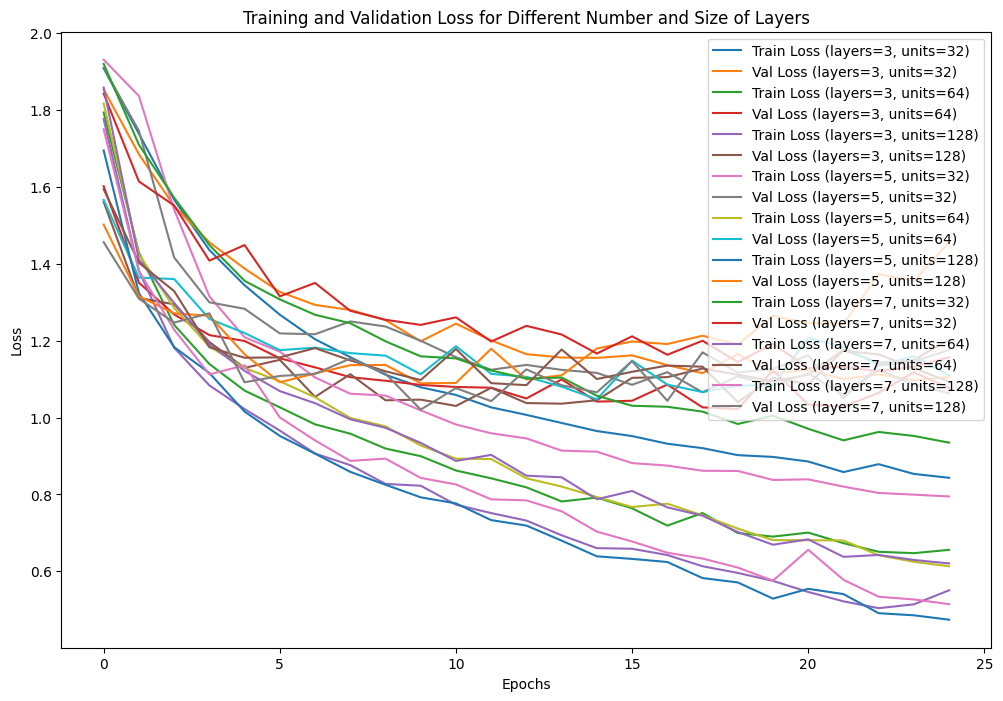

In [17]:
input_dim_patients = x_train_patients.shape[1]

units = [32, 64, 128]  # dimensiunea fiecărui strat
layers = [3, 5, 7]  # numărul de straturi
history_dict = {}

# Antrenarea modelelor cu dimensiuni diferite ale straturilor
for layer in layers:
    history_dict[layer] = {}
    for unit in units:
        model = create_mlp_model(input_dim=input_dim_patients, layers=layer, units=unit)
        history = model.fit(x_train_patients, y_train_patients, epochs=25, batch_size=24, validation_data=(x_test_patients, y_test_patients))
        history_dict[layer][unit] = history

# Plotarea curbelor de pierdere pentru fiecare variație a numărului și dimensiunii straturilor
plt.figure(figsize=(12, 8))

for layer in layers:
    for unit in units:
        history = history_dict[layer][unit]
        plt.plot(history.history['loss'], label=f'Train Loss (layers={layer}, units={unit})')
        plt.plot(history.history['val_loss'], label=f'Val Loss (layers={layer}, units={unit})')

plt.title('Training and Validation Loss for Different Number and Size of Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


MLP - PTB

Epoch 1/25
486/486 [==============================] - 3s 4ms/step - loss: 0.3818 - accuracy: 0.8108 - val_loss: 0.2950 - val_accuracy: 0.8863
Epoch 2/25
486/486 [==============================] - 2s 3ms/step - loss: 0.2493 - accuracy: 0.9028 - val_loss: 0.2458 - val_accuracy: 0.8987
Epoch 3/25
486/486 [==============================] - 2s 3ms/step - loss: 0.1964 - accuracy: 0.9224 - val_loss: 0.2077 - val_accuracy: 0.9172
Epoch 4/25
486/486 [==============================] - 2s 3ms/step - loss: 0.1630 - accuracy: 0.9380 - val_loss: 0.1794 - val_accuracy: 0.9282
Epoch 5/25
486/486 [==============================] - 2s 3ms/step - loss: 0.1409 - accuracy: 0.9473 - val_loss: 0.1737 - val_accuracy: 0.9358
Epoch 6/25
486/486 [==============================] - 2s 3ms/step - loss: 0.1222 - accuracy: 0.9540 - val_loss: 0.1578 - val_accuracy: 0.9392
Epoch 7/25
486/486 [==============================] - 2s 3ms/step - loss: 0.1133 - accuracy: 0.9580 - val_loss: 0.1575 - val_accuracy: 0.9392
Epoch 

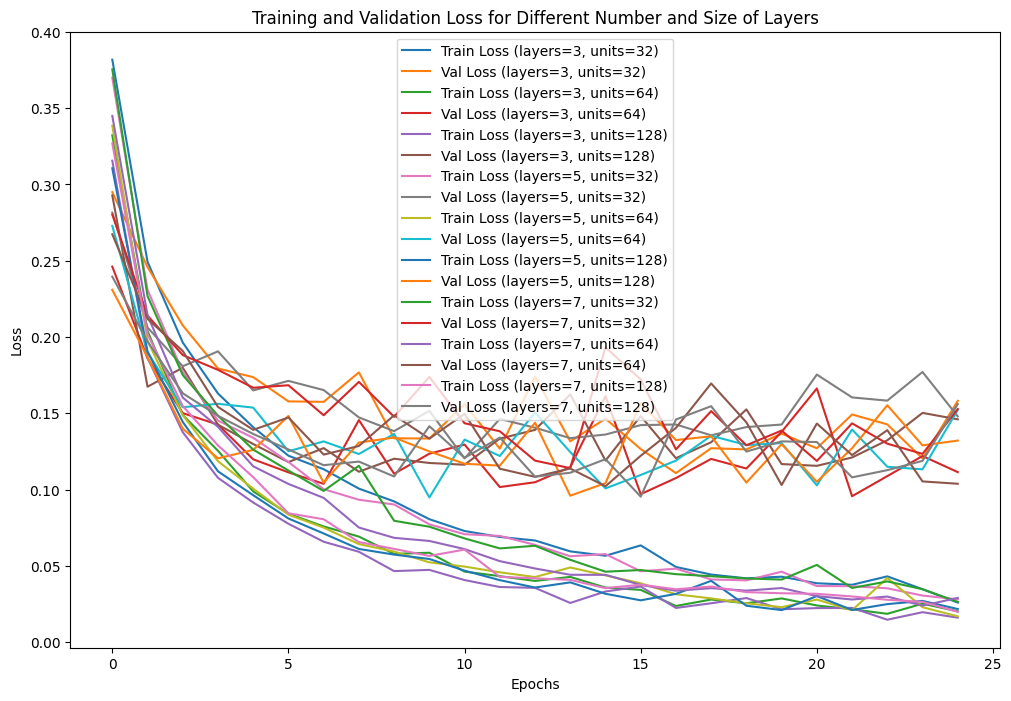

In [18]:
input_dim_patients = x_train_ptb.shape[1]

units = [32, 64, 128]  # dimensiunea fiecărui strat
layers = [3, 5, 7]  # numărul de straturi
history_dict = {}

# Antrenarea modelelor cu dimensiuni diferite ale straturilor
for layer in layers:
    history_dict[layer] = {}
    for unit in units:
        model = create_mlp_model_2(input_dim=input_dim_patients, layers=layer, units=unit)
        history = model.fit(x_train_ptb, y_train_ptb, epochs=25, batch_size=24, validation_data=(x_test_ptb, y_test_ptb))
        history_dict[layer][unit] = history

# Plotarea curbelor de pierdere pentru fiecare variație a numărului și dimensiunii straturilor
plt.figure(figsize=(12, 8))

for layer in layers:
    for unit in units:
        history = history_dict[layer][unit]
        plt.plot(history.history['loss'], label=f'Train Loss (layers={layer}, units={unit})')
        plt.plot(history.history['val_loss'], label=f'Val Loss (layers={layer}, units={unit})')

plt.title('Training and Validation Loss for Different Number and Size of Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Convolution model - PTB

Epoch 1/15
243/243 [==============================] - 5s 8ms/step - loss: 0.5652 - accuracy: 0.7921 - val_loss: 2.0082 - val_accuracy: 0.7217
Epoch 2/15
243/243 [==============================] - 2s 6ms/step - loss: 0.4053 - accuracy: 0.8640 - val_loss: 2.0371 - val_accuracy: 0.7217
Epoch 3/15
243/243 [==============================] - 2s 6ms/step - loss: 0.3552 - accuracy: 0.8796 - val_loss: 0.9179 - val_accuracy: 0.7269
Epoch 4/15
243/243 [==============================] - 2s 7ms/step - loss: 0.3311 - accuracy: 0.8859 - val_loss: 0.3643 - val_accuracy: 0.8760
Epoch 5/15
243/243 [==============================] - 2s 6ms/step - loss: 0.3138 - accuracy: 0.8882 - val_loss: 0.2970 - val_accuracy: 0.8925
Epoch 6/15
243/243 [==============================] - 2s 6ms/step - loss: 0.2920 - accuracy: 0.8979 - val_loss: 0.4350 - val_accuracy: 0.8100
Epoch 7/15
243/243 [==============================] - 2s 6ms/step - loss: 0.2757 - accuracy: 0.9018 - val_loss: 0.6770 - val_accuracy: 0.7430
Epoch 

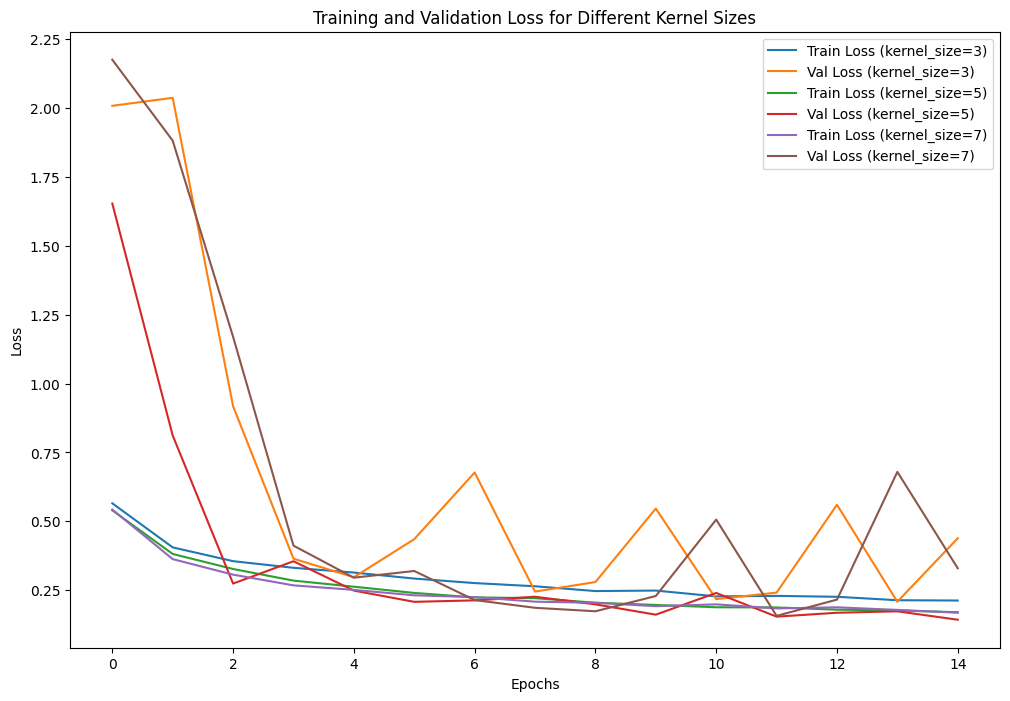

In [13]:
kernel_sizes = [3, 5, 7]
history_dict = {}

# Antrenarea modelelor cu dimensiuni diferite ale kernelelor
for kernel_size in kernel_sizes:
    model = create_conv_model(kernel_size)
    history = model.fit(x_train_ptb, y_train_ptb, epochs=15, batch_size=48, validation_data=(x_test_ptb, y_test_ptb))
    history_dict[kernel_size] = history

# Plotarea curbelor de pierdere pentru fiecare variație a kernel size-ului
plt.figure(figsize=(12, 8))

for kernel_size in kernel_sizes:
    history = history_dict[kernel_size]
    plt.plot(history.history['loss'], label=f'Train Loss (kernel_size={kernel_size})')
    plt.plot(history.history['val_loss'], label=f'Val Loss (kernel_size={kernel_size})')

plt.title('Training and Validation Loss for Different Kernel Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MLP - Patients

In [36]:
input_dim_patients = x_train_patients.shape[1]

units = [32, 64, 128]  # dimensiunea fiecărui strat
layers = [3, 5, 7]  # numărul de straturi
results = []

for layer in layers:
    for unit in units:
        model = create_mlp_model(input_dim=input_dim_patients, layers=layer, units=unit)
        model.fit(x_train_patients, y_train_patients, epochs=25, batch_size=24, validation_data=(x_test_patients, y_test_patients), verbose=0)
        loss, accuracy = model.evaluate(x_test_patients, y_test_patients, verbose=0)
        y_pred = model.predict(x_test_patients)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test_patients, axis=1)

        report = classification_report(y_true, y_pred_classes, output_dict=True)

        # Adăugăm rezultatele în listă
        result = {'layers': layer, 'units': unit, 'loss': loss, 'accuracy': accuracy}

        for cls in range(7):  # Pentru fiecare clasă (0 până la 6)
            result[f'precision_class_{cls}'] = report[str(cls)]['precision']
            result[f'recall_class_{cls}'] = report[str(cls)]['recall']
            result[f'f1_class_{cls}'] = report[str(cls)]['f1-score']

        results.append(result)

# Convertim rezultatele într-un DataFrame
results_df = pd.DataFrame(results)
print(results_df)


13/13 [==============================] - 0s 2ms/step
   layers  units      loss  accuracy  precision_class_0  recall_class_0  \
0       3     32  1.128247  0.620779           0.641791        0.796296   
1       3     64  1.107930  0.672727           0.750000        0.777778   
2       3    128  1.251986  0.683117           0.681159        0.870370   
3       5     32  1.026120  0.657143           0.812500        0.722222   
4       5     64  1.146200  0.680519           0.736842        0.777778   
5       5    128  1.249394  0.659740           0.891304        0.759259   
6       7     32  1.131752  0.610390           0.636364        0.777778   
7       7     64  1.107266  0.651948           0.750000        0.722222   
8       7    128  1.204360  0.664935           0.775862        0.833333   

   f1_class_0  precision_class_1  recall_class_1  f1_class_1  \
0    0.710744           0.433333        0.309524    0.361111   
1    0.763636           0.571429        0.571429    0.571429   
2   

In [37]:
pd.set_option('display.max_columns', None)  # Afișează toate coloanele
display(results_df)

,layers,units,loss,accuracy,precision_class_0,recall_class_0,f1_class_0,precision_class_1,recall_class_1,f1_class_1,precision_class_2,recall_class_2,f1_class_2,precision_class_3,recall_class_3,f1_class_3,precision_class_4,recall_class_4,f1_class_4,precision_class_5,recall_class_5,f1_class_5,precision_class_6,recall_class_6,f1_class_6
0,3,32,1.128247,0.620779,0.641791,0.796296,0.710744,0.433333,0.309524,0.361111,0.564103,0.431373,0.488889,0.638889,0.359375,0.460000,0.515625,0.515625,0.515625,0.527027,0.906977,0.666667,0.880000,0.985075,0.929577
1,3,64,1.107930,0.672727,0.750000,0.777778,0.763636,0.571429,0.571429,0.571429,0.600000,0.529412,0.562500,0.593220,0.546875,0.569106,0.586957,0.421875,0.490909,0.596774,0.860465,0.704762,0.893333,1.000000,0.943662
2,3,128,1.251986,0.683117,0.681159,0.870370,0.764228,0.676471,0.547619,0.605263,0.446154,0.568627,0.500000,0.769231,0.468750,0.582524,0.590164,0.562500,0.576000,0.720930,0.720930,0.720930,0.905405,1.000000,0.950355
3,5,32,1.026120,0.657143,0.812500,0.722222,0.764706,0.448980,0.523810,0.483516,0.543478,0.490196,0.515464,0.605263,0.359375,0.450980,0.584615,0.593750,0.589147,0.629032,0.906977,0.742857,0.870130,1.000000,0.930556
4,5,64,1.146200,0.680519,0.736842,0.777778,0.756757,0.472727,0.619048,0.536082,0.758621,0.431373,0.550000,0.636364,0.546875,0.588235,0.627451,0.500000,0.556522,0.622951,0.883721,0.730769,0.870130,1.000000,0.930556
5,5,128,1.249394,0.659740,0.891304,0.759259,0.820000,0.479167,0.547619,0.511111,0.566038,0.588235,0.576923,0.539474,0.640625,0.585714,0.594595,0.343750,0.435644,0.581818,0.744186,0.653061,0.928571,0.970149,0.948905
6,7,32,1.131752,0.610390,0.636364,0.777778,0.700000,0.362069,0.500000,0.420000,0.611111,0.215686,0.318841,0.523810,0.515625,0.519685,0.604651,0.406250,0.485981,0.600000,0.837209,0.699029,0.857143,0.985075,0.916667
7,7,64,1.107266,0.651948,0.750000,0.722222,0.735849,0.387097,0.571429,0.461538,0.545455,0.470588,0.505263,0.741935,0.359375,0.484211,0.596774,0.578125,0.587302,0.616667,0.860465,0.718447,0.905405,1.000000,0.950355
8,7,128,1.204360,0.664935,0.775862,0.833333,0.803571,0.478261,0.523810,0.500000,0.617647,0.411765,0.494118,0.627451,0.500000,0.556522,0.542373,0.500000,0.520325,0.587302,0.860465,0.698113,0.905405,1.000000,0.950355


13/13 [==============================] - 0s 2ms/step


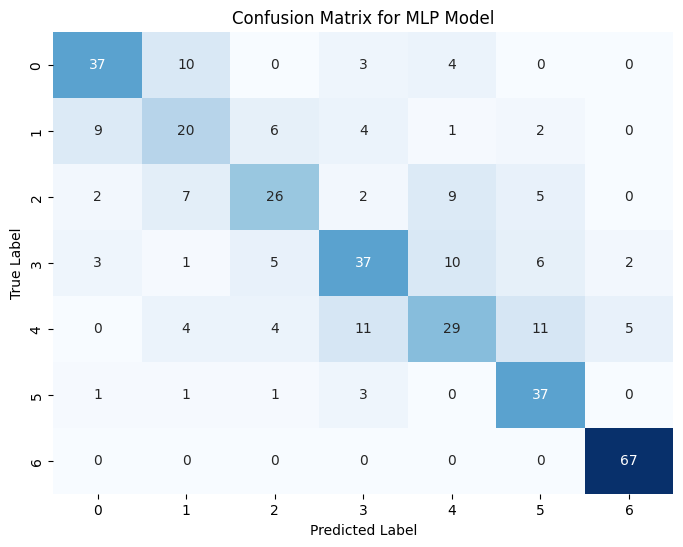

In [41]:

# Antrenarea și evaluarea modelului MLP
input_dim_patients = x_train_patients.shape[1]
layers = 5  # numărul de straturi
units = 64  # dimensiunea fiecărui strat

model_patients = create_mlp_model(input_dim=input_dim_patients, layers=layers, units=units)
model_patients.fit(x_train_patients, y_train_patients, epochs=25, batch_size=24, validation_data=(x_test_patients, y_test_patients), verbose=0)

# Obținerea predicțiilor
y_pred = model_patients.predict(x_test_patients)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true = np.argmax(y_test_patients, axis=1)  # Convert to class labels

# Calcularea matricei de confuzie
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Vizualizarea matricei de confuzie
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MLP Model')
plt.show()


MLP - PTB

In [34]:
input_dim_patients = x_train_ptb.shape[1]
layers = [2, 3, 4]  # numărul de straturi
units = [64, 128, 256]  # dimensiunea fiecărui strat
results = []

for layer in layers:
    for unit in units:
        model = create_mlp_model_2(input_dim=input_dim_patients, layers=layer, units=unit)
        model.fit(x_train_ptb, y_train_ptb, epochs=15, batch_size=24, validation_data=(x_test_ptb, y_test_ptb), verbose=0)
        loss, accuracy = model.evaluate(x_test_ptb, y_test_ptb, verbose=0)
        y_pred = model.predict(x_test_ptb)
        y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)  # Convert to binary classes
        y_true = y_test_ptb.values.reshape(-1)

        report = classification_report(y_true, y_pred_classes, output_dict=True)
        #print(report)

        # Adăugăm rezultatele în listă
        result = {'layers': layer, 'units': unit, 'loss': loss, 'accuracy': accuracy}

        # Pentru clasele 0 și 1
        for cls in ['0.0', '1.0']:
            result[f'precision_class_{cls}'] = report[cls]['precision']
            result[f'recall_class_{cls}'] = report[cls]['recall']
            result[f'f1_class_{cls}'] = report[cls]['f1-score']

        results.append(result)

# Convertim rezultatele într-un DataFrame
results_df = pd.DataFrame(results)
display(results_df)



91/91 [==============================] - 0s 1ms/step


,layers,units,loss,accuracy,precision_class_0.0,recall_class_0.0,f1_class_0.0,precision_class_1.0,recall_class_1.0,f1_class_1.0
0,2,64,0.099340,0.969770,0.946782,0.944444,0.945612,0.978602,0.979534,0.979068
1,2,128,0.122943,0.958434,0.923739,0.927160,0.925447,0.971878,0.970490,0.971184
2,2,256,0.121373,0.969426,0.922626,0.971605,0.946482,0.988824,0.968586,0.978601
3,3,64,0.122236,0.967709,0.947500,0.935802,0.941615,0.975367,0.980010,0.977683
4,3,128,0.133894,0.963586,0.976965,0.890123,0.931525,0.959043,0.991909,0.975199
5,3,256,0.102980,0.974923,0.962359,0.946914,0.954574,0.979659,0.985721,0.982681
6,4,64,0.114866,0.971144,0.935252,0.962963,0.948905,0.985556,0.974298,0.979895
7,4,128,0.125339,0.959808,0.960159,0.892593,0.925144,0.959685,0.985721,0.972529
8,4,256,0.110848,0.973205,0.937799,0.967901,0.952612,0.987470,0.975250,0.981322


In [38]:
kernel_sizes = [3, 5, 7]

# Lista pentru stocarea rezultatelor
results = []

# Antrenarea și evaluarea modelelor pentru fiecare dimensiune de kernel
for kernel_size in kernel_sizes:
    model = create_conv_model(kernel_size)
    history = model.fit(x_train_ptb, y_train_ptb, epochs=15, batch_size=48, validation_data=(x_test_ptb, y_test_ptb), verbose=0)
    loss, accuracy = model.evaluate(x_test_ptb, y_test_ptb, verbose=0)
    y_pred = model.predict(x_test_ptb)
    y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)  # Convert to binary classes
    y_true = y_test_ptb.values.reshape(-1)

    # Calculul raportului de clasificare
    report = classification_report(y_true, y_pred_classes, output_dict=True)

    # Adăugarea rezultatelor în listă
    result = {'kernel_size': kernel_size, 'loss': loss, 'accuracy': accuracy}

    # Adăugarea metricilor de performanță pentru fiecare clasă în parte
    for cls in ['0.0', '1.0']:
        result[f'precision_class_{cls}'] = report[cls]['precision']
        result[f'recall_class_{cls}'] = report[cls]['recall']
        result[f'f1_class_{cls}'] = report[cls]['f1-score']

    results.append(result)

# Convertirea rezultatelor în DataFrame
results_df = pd.DataFrame(results)

# Afișarea tabelului cu rezultatele
display(results_df)

91/91 [==============================] - 0s 2ms/step


,kernel_size,loss,accuracy,precision_class_0.0,recall_class_0.0,f1_class_0.0,precision_class_1.0,recall_class_1.0,f1_class_1.0
0,3,0.173081,0.949845,0.905868,0.914815,0.910319,0.967033,0.963351,0.965188
1,5,0.186505,0.956029,0.925187,0.916049,0.920596,0.967757,0.971442,0.969596
2,7,0.219615,0.917554,0.839286,0.870370,0.854545,0.949300,0.935745,0.942474


91/91 [==============================] - 0s 1ms/step


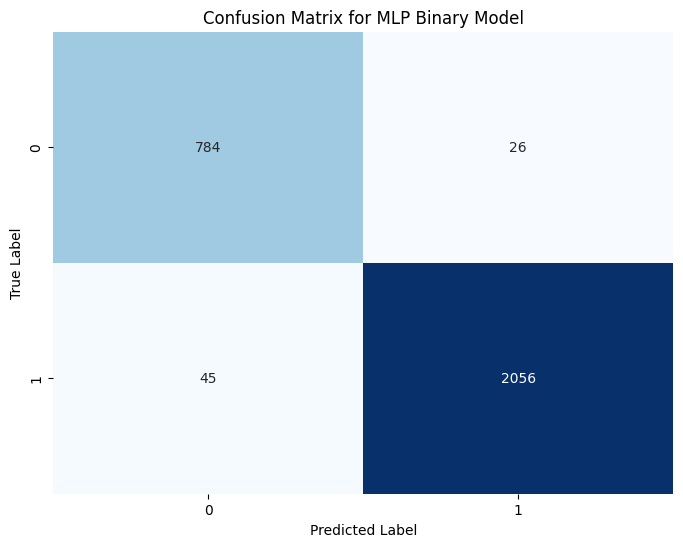

In [42]:
input_dim_patients = x_train_ptb.shape[1]
layers = 3  # numărul de straturi
units = 256  # dimensiunea fiecărui strat

model_ptb = create_mlp_model_2(input_dim=input_dim_patients, layers=layers, units=units)
model_ptb.fit(x_train_ptb, y_train_ptb, epochs=15, batch_size=24, validation_data=(x_test_ptb, y_test_ptb), verbose=0)

# Obținerea predicțiilor
y_pred = model_ptb.predict(x_test_ptb)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)  # Convert to binary classes
y_true = y_test_ptb.values.reshape(-1)

# Calcularea matricei de confuzie
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Vizualizarea matricei de confuzie
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MLP Binary Model')
plt.show()

Conv - PTB

91/91 [==============================] - 0s 2ms/step


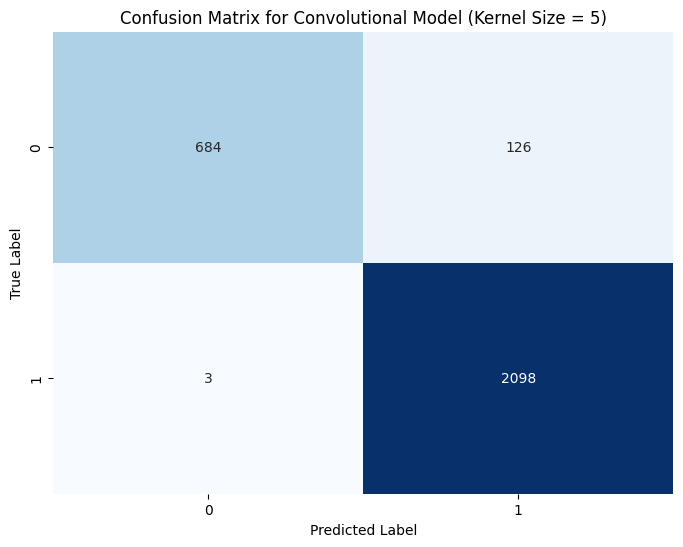

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Antrenarea și evaluarea modelului convoluțional
kernel_size = 5
model = create_conv_model(kernel_size)
model.fit(x_train_ptb, y_train_ptb, epochs=15, batch_size=48, validation_data=(x_test_ptb, y_test_ptb), verbose=0)

# Obținerea predicțiilor
y_pred = model.predict(x_test_ptb)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
y_true = y_test_ptb.values.reshape(-1)

# Calcularea matricei de confuzie
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Vizualizarea matricei de confuzie
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Convolutional Model (Kernel Size = {kernel_size})')
plt.show()
